In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re

In [2]:
#NASA Exoplanet Archieve of WASP-17b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-17b

In [3]:
df = pd.read_csv("wasp_17b_parameters.csv")#, header=None)
df = df.drop(columns=df.columns[0])

In [4]:
def read_df_params(df_param_list, df_ref_list, add_none=False):
    """
    Reading a row of literature values for a given parameter and converting 
    it into an array.

    Format that it will be converted to: [value, +error, -error]

    Format reading examples:
    "0.028+/-0.015" -> [0.028, 0.015, -0.015]
    "0.3+0.5-0.1" -> [0.3, 0.5, -0.1]
    "3.0" -> [3.0, 0.0, 0.0]


    Parameters
    ----------
    df_params_list : array_like, str
        Array of literature values of a given parameter.

    df_ref_list : array_like, str
        Array of authors/references that published the given parameter.

    add_none : bool
        False -> Only return values that authors have published
        True  -> Return all values     

    Returns
    -------
        param_list : ndarray
            An array of [value, +error, -error].
        
        ref_list : ndarray, str
            An array of authors.
    
    """

    param_list = []
    ref_list = []

    p_mask = np.where(df_param_list=="---", False, True) #Masking values

    for param, pmask, ref in zip(df_param_list, p_mask, df_ref_list):
        if pmask == True:
            if "+/-" in param: #If param in format "123+/-12"
                param = re.split('\+\/\-', param)
                param = [float(param[0]), float(param[1]), float('-' + param[1])]

            elif ("+" in param) and ("-" in param): #If param in format "123+12-23"
                if param[0] == "-": #If param value is negative
                    param = e[1:]
                    param_tmp = re.split('\+|\-', param)
                    param = [float(param_tmp[0]), float(param_tmp[1]), float('-' + param_tmp[1])]

                else: #param value is positive
                    param_tmp = re.split('\+|\-', param)
                    param = [float(param_tmp[0]), float(param_tmp[1]), float('-' + param_tmp[1])]
                    
            else: #If param value has no error
                param = [float(param), 0.0, 0.0]

            param_list.append(param)
            ref_list.append(ref)

        if (add_none == True) and (pmask == False):
            param_list.append(None)
            ref_list.append(ref)


    param_list = np.array(param_list)
    ref_list = np.array(ref_list)

    return [param_list, ref_list]
    

        

In [5]:
df_ref_list = df.columns

df_e_list = df.loc[0] #Eccentricty row
df_i_list = df.loc[1] #Orbtial inclination row
df_P_list = df.loc[2] #Orbtial period row
df_R_list = df.loc[3] #Planetary radius row
df_a_list = df.loc[4] #Semi-major axis row
df_b_list = df.loc[5] #Impact parameter row
df_RpRs_list = df.loc[6] #R_p/R_star row
df_w_list = df.loc[7]
df_color = df.loc[8] #Colours

e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)



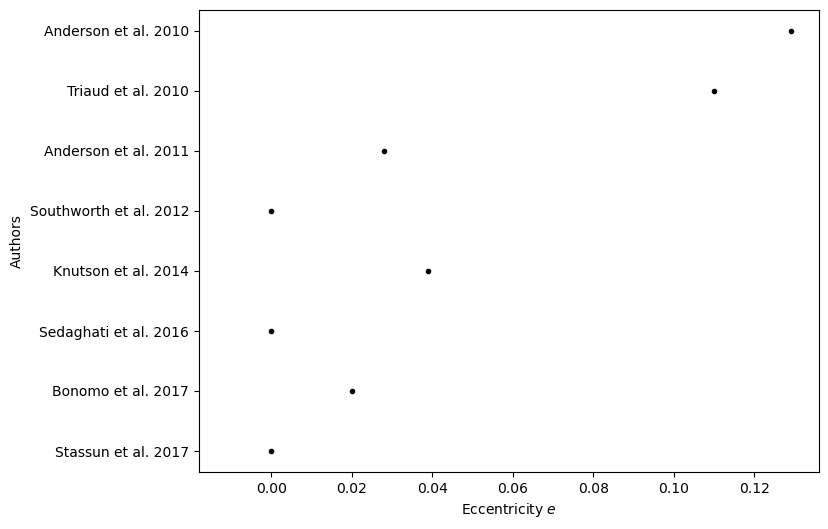

In [6]:
y = range(0, len(e_ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [e_list[:,1], e_list[:,2]]
plt.errorbar(e_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="e")

plt.xlabel(r"Eccentricity $e$")
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(e_ref_list)

# ax.legend()
plt.show()


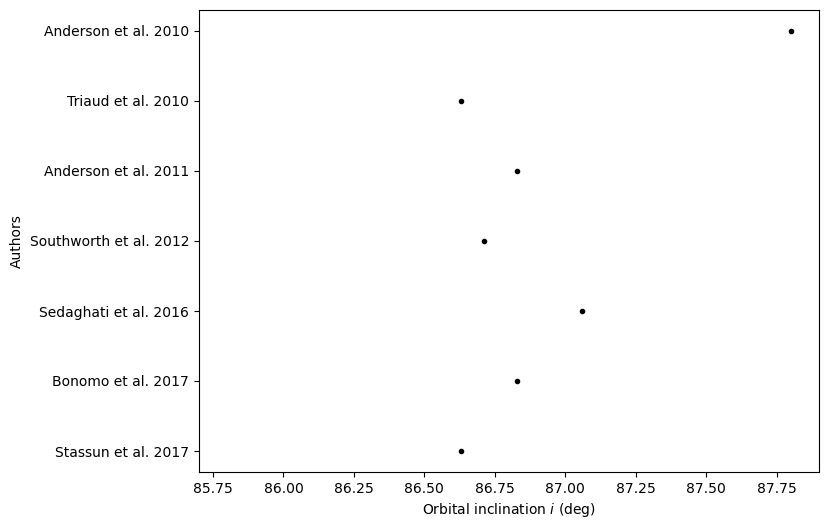

In [7]:
#Orbtial inclination
y = range(0, len(i_ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [i_list[:,1], i_list[:,2]]
plt.errorbar(i_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r"Orbital inclination $i$ (deg)")
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(i_ref_list)

# ax.legend()
plt.show()

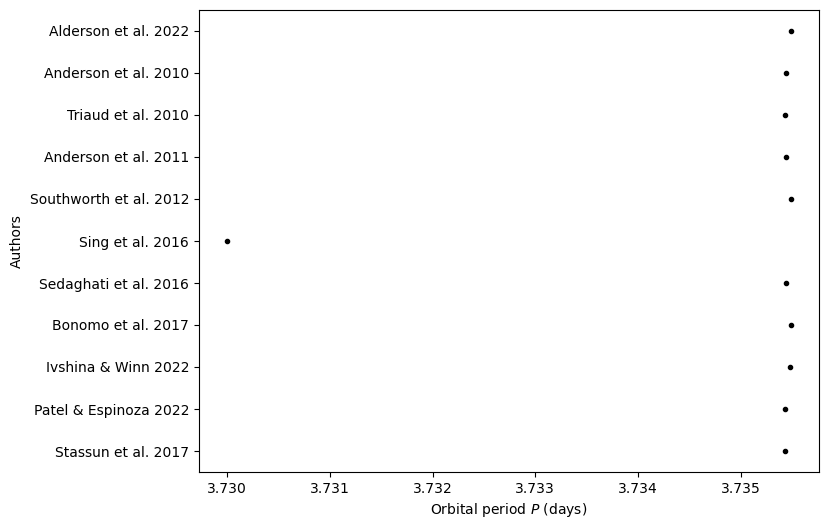

In [8]:
#Orbtial period
y = range(0, len(P_ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [P_list[:,1], P_list[:,2]]
plt.errorbar(P_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r"Orbital period $P$ (days)")
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(P_ref_list)

# ax.legend()
plt.show()

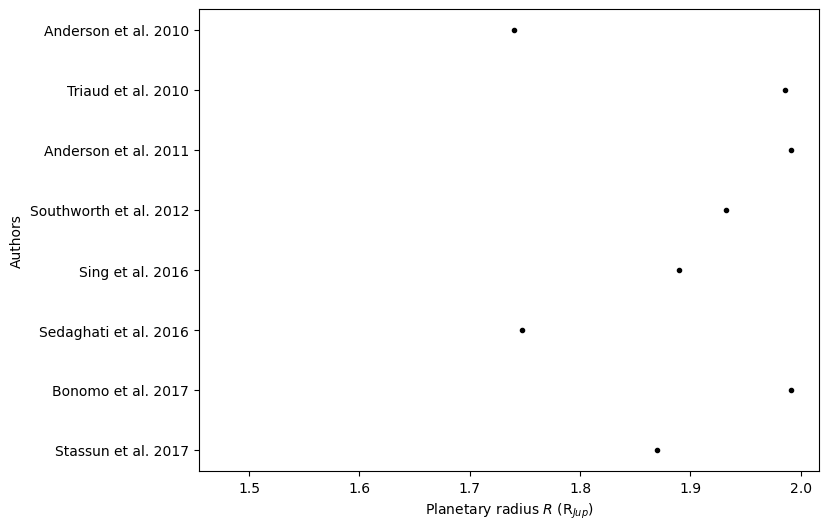

In [9]:
#Planetary radius
y = range(0, len(R_ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [R_list[:,1], R_list[:,2]]
plt.errorbar(R_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r'Planetary radius $R$ (R$_{Jup}$)')
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(R_ref_list)

# ax.legend()
plt.show()

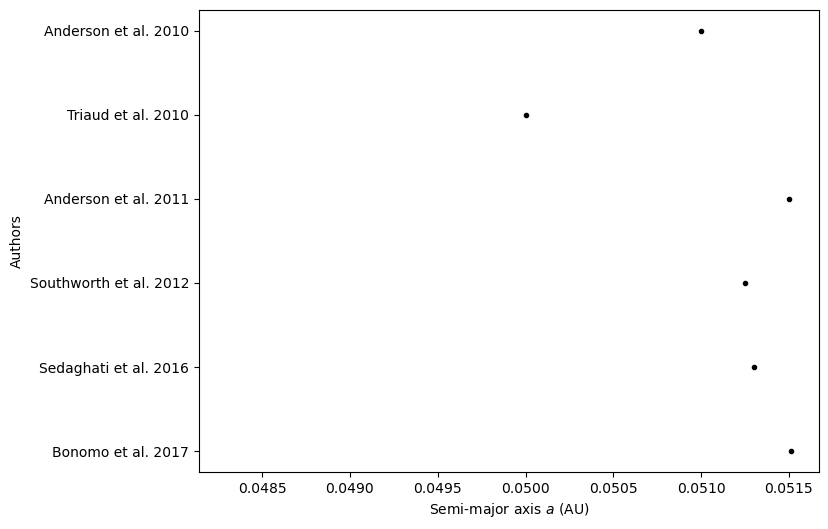

In [10]:
#Semi-major axis
y = range(0, len(a_ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [a_list[:,1], a_list[:,2]]
plt.errorbar(a_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r'Semi-major axis $a$ (AU)')
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(a_ref_list)

# ax.legend()
plt.show()

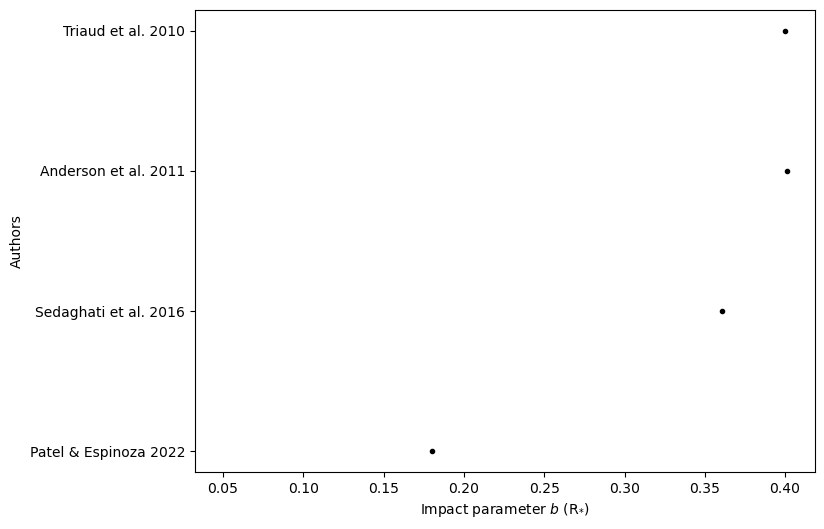

In [11]:
#Impact parameter
y = range(0, len(b_ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [b_list[:,1], b_list[:,2]]
plt.errorbar(b_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r'Impact parameter $b$ (R$_{*}$)')
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(b_ref_list)

# ax.legend()
plt.show()

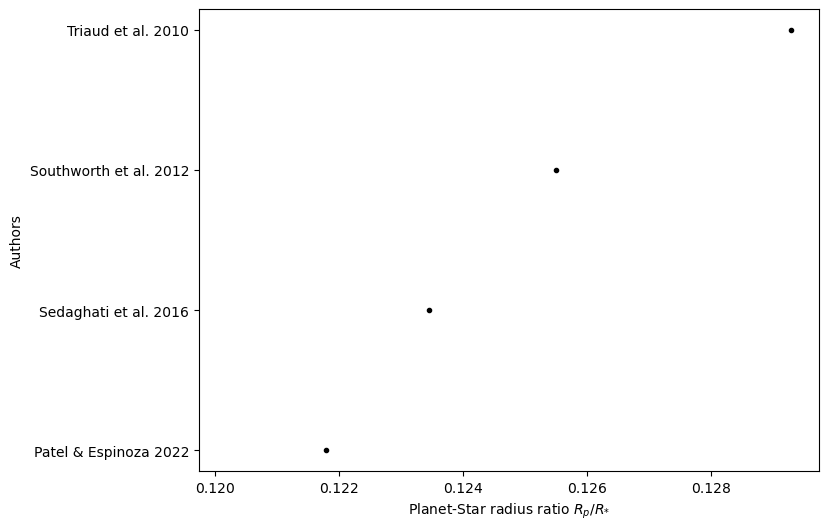

In [12]:
#R_p/R_star
y = range(0, len(RpRs_ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [RpRs_list[:,1], RpRs_list[:,2]]
plt.errorbar(RpRs_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(RpRs_ref_list)

# ax.legend()
plt.show()